In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")
train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
id,,,,,,,,,,,,,,
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [4]:
train.describe().T[["count","mean","50%","std","min","max"]].round({"mean":3,"std":3})

,count,mean,50%,std,min,max
Age,630000.0,54.137,54.0,8.256,29.0,77.0
Sex,630000.0,0.715,1.0,0.452,0.0,1.0
Chest pain type,630000.0,3.313,4.0,0.852,1.0,4.0
BP,630000.0,130.497,130.0,14.976,94.0,200.0
Cholesterol,630000.0,245.012,243.0,33.682,126.0,564.0
FBS over 120,630000.0,0.080,0.0,0.271,0.0,1.0
EKG results,630000.0,0.982,0.0,0.999,0.0,2.0
Max HR,630000.0,152.817,157.0,19.113,71.0,202.0
Exercise angina,630000.0,0.274,0.0,0.446,0.0,1.0
ST depression,630000.0,0.716,0.1,0.948,0.0,6.2


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  object 
dtypes: float6

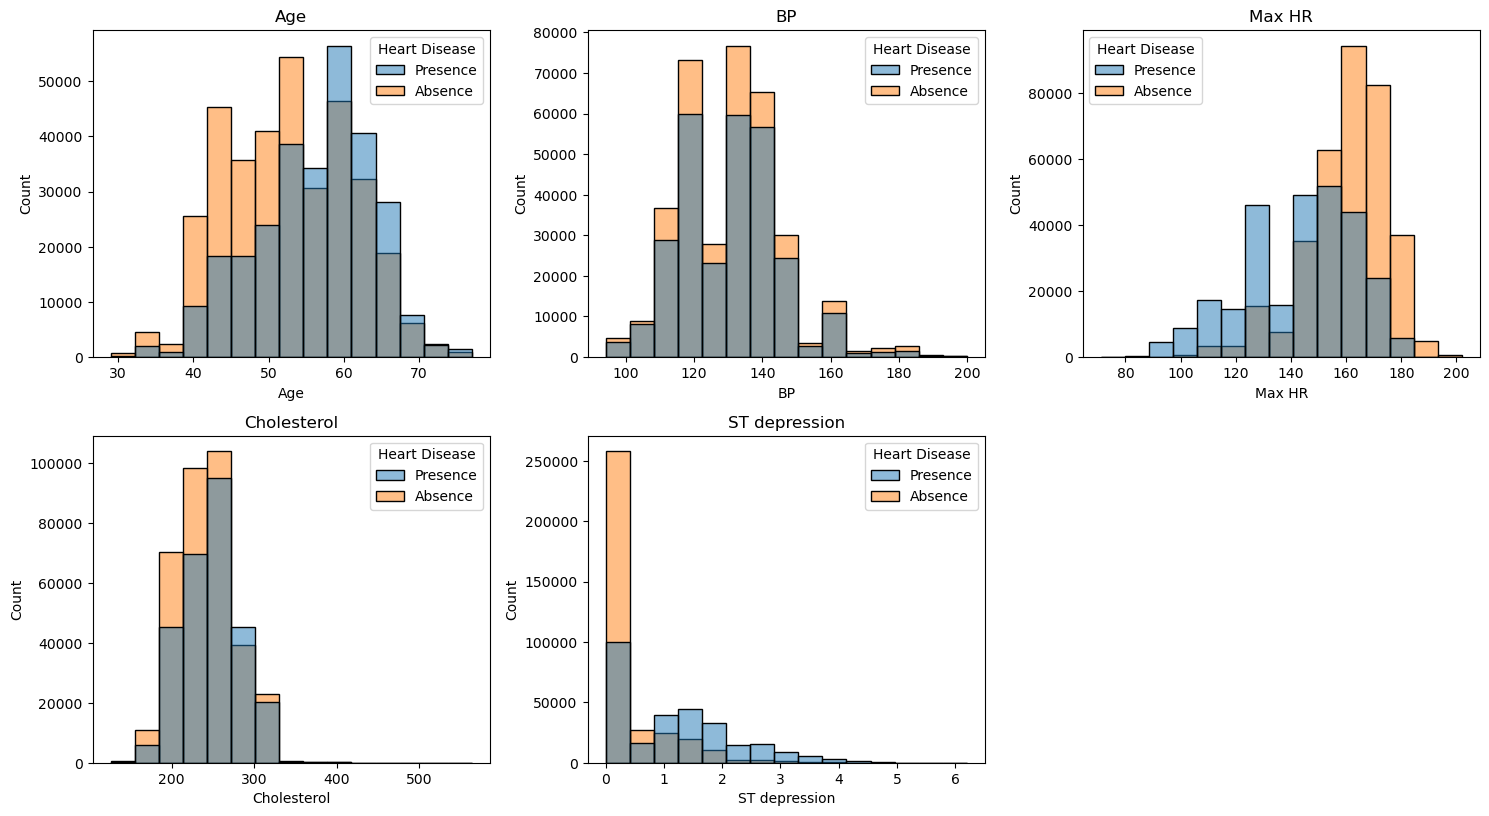

In [6]:
X_columns = ["Age","BP","Max HR","Cholesterol","ST depression"]

rows, cols = 5, 3
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_columns[:rows*cols]):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(
        data=train,
        x=col,
        hue="Heart Disease",
        bins=15
    )
    plt.title(col)

plt.tight_layout()
plt.savefig("hist_plot.png")

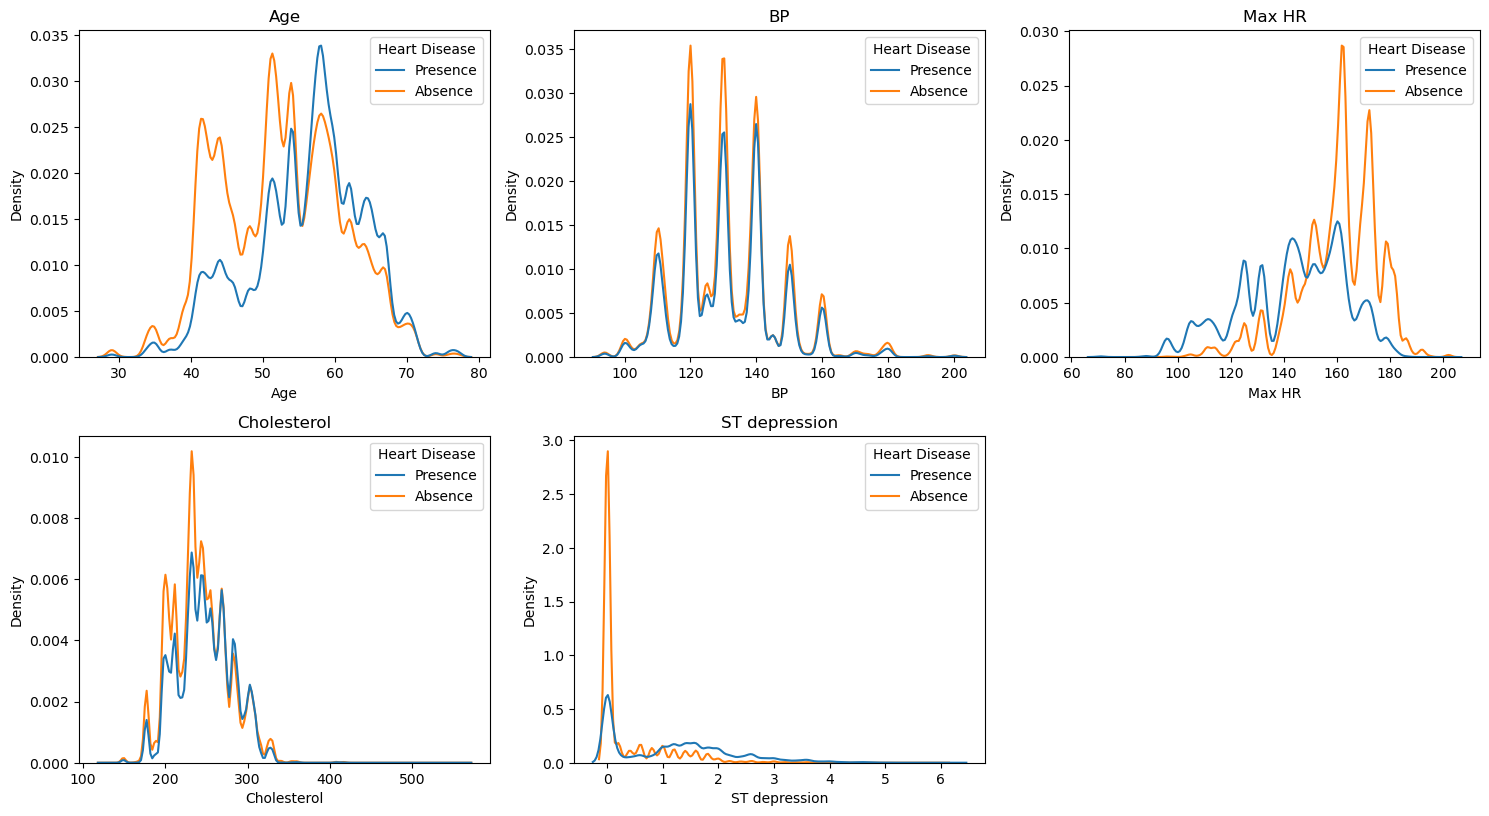

In [7]:
X_columns = ["Age","BP","Max HR","Cholesterol","ST depression"]

rows, cols = 5, 3
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_columns[:rows*cols]):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(
        data=train,
        x=col,
        hue="Heart Disease",
    )
    plt.title(col)

plt.tight_layout()
plt.savefig("kde_plot.png")
plt.show()

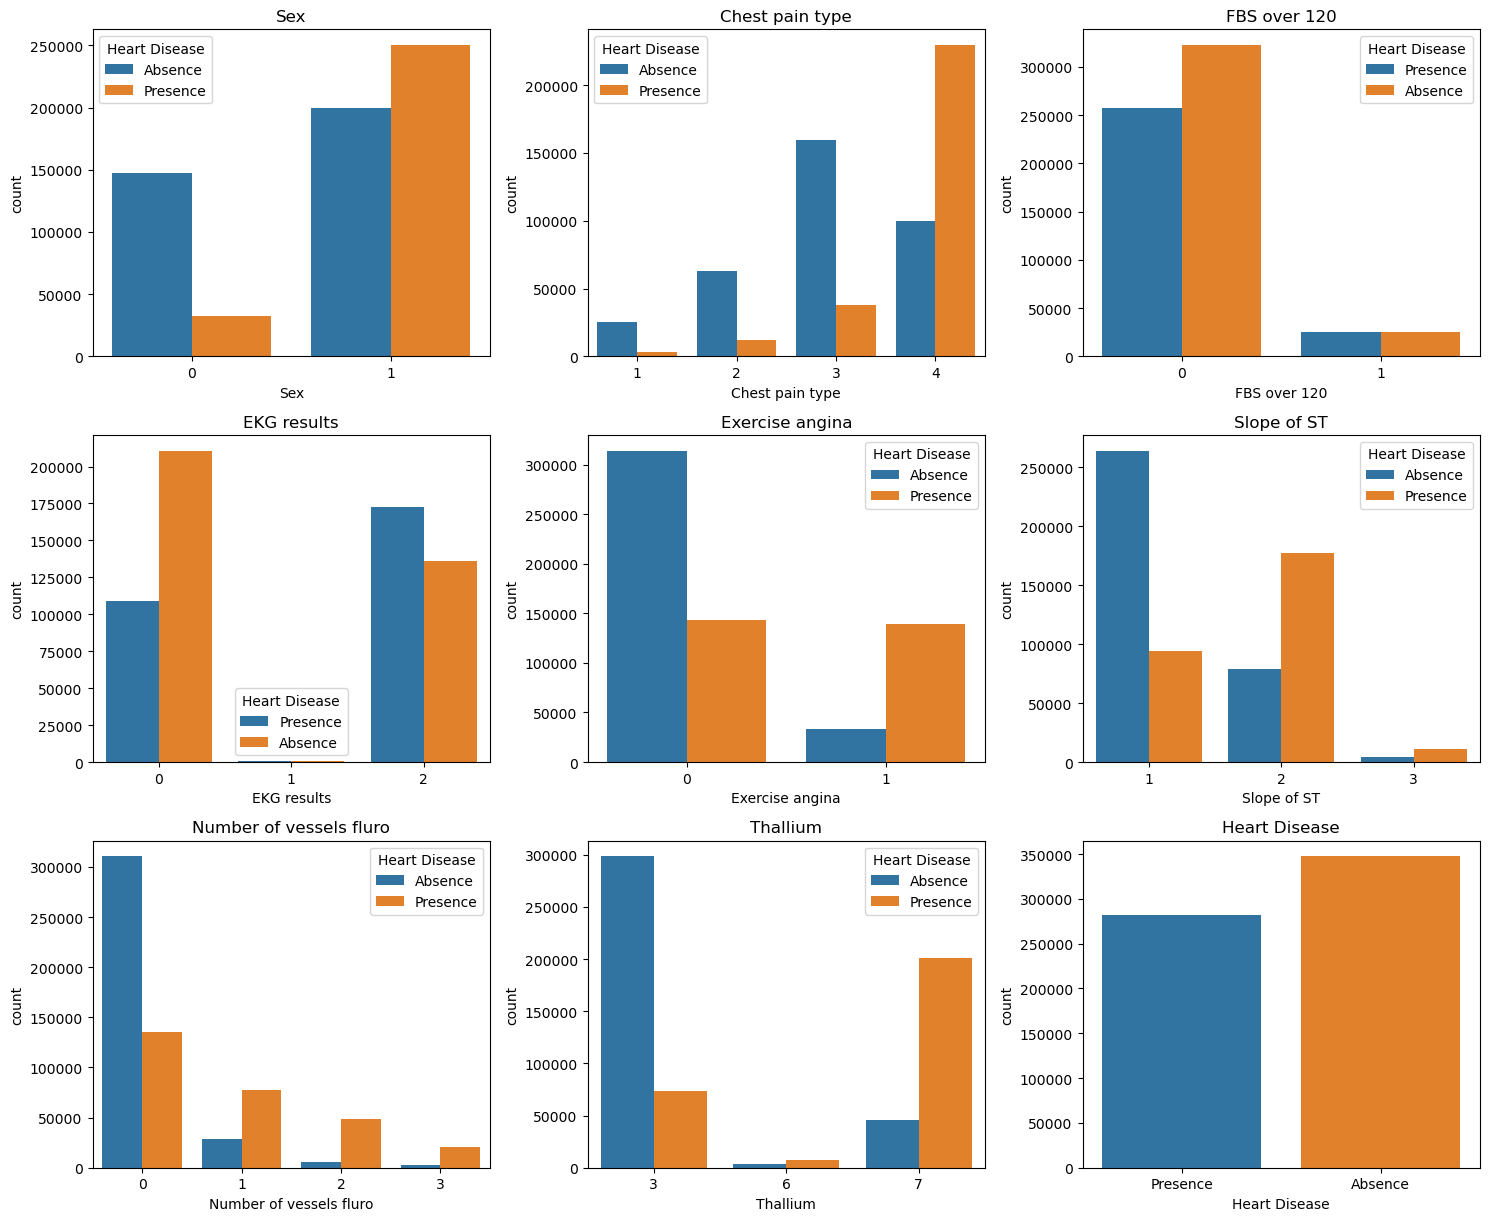

In [8]:
X_columns = train.drop(columns=["Age","BP","Max HR","Cholesterol","ST depression"]).columns

rows, cols = 5, 3
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_columns[:rows*cols]):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(
        data=train,
        x=col,
        hue="Heart Disease",
    )
    plt.title(col)

plt.tight_layout()
plt.savefig("countplot.png")
plt.show()

# Insights
1. persion with 4 th type of chest pain have high chance of heart desiease - high
2. number of vessels fluro -  high
3. Males (1) appear to have more heart disease cases than females (0) - medium
4. fbs - Distribution looks similar for both groups - low
5. Some EKG result categories show higher heart disease presence. - medium
6. If exercise-induced angina = 1, heart disease presence increases significantly. - high
7. Certain ST slope categories strongly correlate with heart disease presence. - high
8. thallium categforis strongly assosiated with heat desease - high

In [9]:
train["Heart Disease"] = train["Heart Disease"].map({
    "Absence": 0,
    "Presence": 1
})


In [10]:
train[train["Heart Disease"] == 1]["Age"].shape

(282454,)

In [11]:
train[train["Heart Disease"] == 1]["Age"].std()


7.768723022924213

In [12]:
train["Heart Disease"].value_counts(normalize=True)


Heart Disease
0    0.55166
1    0.44834
Name: proportion, dtype: float64

data is not tha much imbalnace diffrent is only about 10 %

In [13]:
train.groupby("Heart Disease")[["Age","BP","Max HR","Cholesterol","ST depression"]].mean()


,Age,BP,Max HR,Cholesterol,ST depression
Heart Disease,,,,,
0,52.558093,130.567381,160.415105,242.499102,0.347808
1,56.079114,130.411366,143.467372,248.103585,1.169104


| Feature       | No Disease (0) | Disease (1) | Difference      | Insight Strength |
| ------------- | -------------- | ----------- | --------------- | ---------------- |
| Age           | 52.56          | 56.08       | **+3.52 years** | 🟡 Moderate      |
| BP            | 130.57         | 130.41      | ~0              | 🔴 Very Weak     |
| Max HR        | 160.41         | 143.47      | **−16.94 bpm**  | 🟢 Strong        |
| Cholesterol   | 242.50         | 248.10      | +5.6            | 🟡 Weak          |
| ST depression | 0.35           | 1.17        | **+0.82**       | 🟢 Very Strong   |


In [14]:

num_cols = ["Age","BP","Max HR","Cholesterol","ST depression"]

cat_cols = train.drop(columns=num_cols + ["Heart Disease"]).columns

for col in cat_cols:
    print("\n", col)
    print(pd.crosstab(train[col], train["Heart Disease"], normalize="index"))



 Sex
Heart Disease         0         1
Sex                              
0              0.821236  0.178764
1              0.444067  0.555933

 Chest pain type
Heart Disease           0         1
Chest pain type                    
1                0.891931  0.108069
2                0.837819  0.162181
3                0.809335  0.190665
4                0.302522  0.697478

 FBS over 120
Heart Disease         0         1
FBS over 120                     
0              0.556583  0.443417
1              0.495039  0.504961

 EKG results
Heart Disease         0         1
EKG results                      
0              0.658502  0.341498
1              0.639939  0.360061
2              0.440440  0.559560

 Exercise angina
Heart Disease           0         1
Exercise angina                    
0                0.686567  0.313433
1                0.193712  0.806288

 Slope of ST
Heart Disease         0         1
Slope of ST                      
1              0.737743  0.262257
2          

<Axes: >

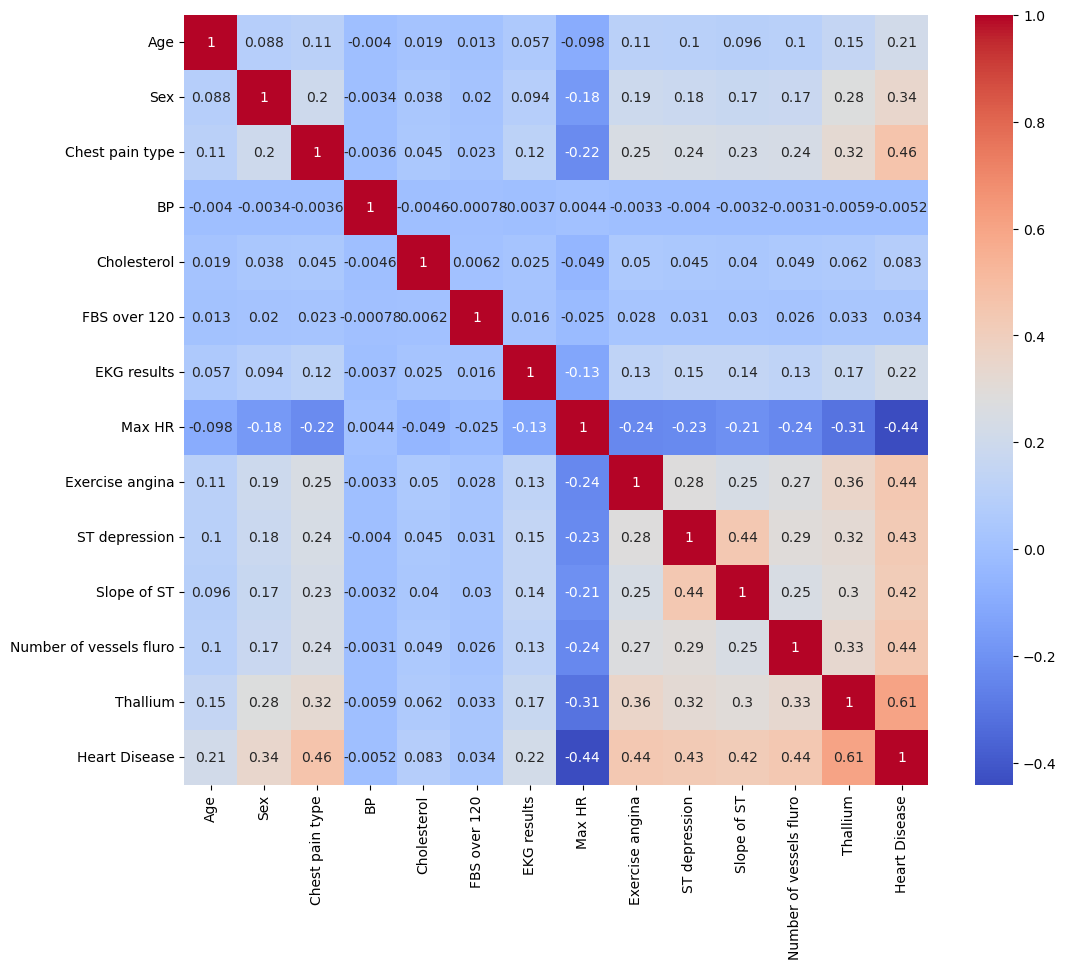

In [15]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, cmap="coolwarm", annot=True)

from all above it can be conform that BP, FBS over 120 and cholestrol are week feature 

# Trying model with all features 

In [16]:
# instend of label encoding we need to onehot encode the features
train_onehot = pd.get_dummies(train, columns=cat_cols, drop_first=True).astype(int)
train_onehot.head()

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,...,EKG results_1,EKG results_2,Exercise angina_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
id,,,,,,,,,,,,,,,,,,,,,
0,58,152,239,158,3,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1
1,52,125,325,171,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,56,160,188,151,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,44,134,229,150,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,58,140,234,125,3,1,1,0,0,1,...,0,1,1,1,0,0,0,1,0,0


In [17]:
# Noramlize features 

num_cols = ["Age","BP","Max HR","Cholesterol","ST depression"]

scaler = StandardScaler()

train_onehot[num_cols] = scaler.fit_transform(train_onehot[num_cols])

In [18]:
# split in in x and y
X = train_onehot.drop(columns=["Heart Disease"])
y = train_onehot["Heart Disease"]

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [20]:
from sklearn.model_selection import cross_val_score
scoring="roc_auc"
log_scores = cross_val_score(log_model, X, y, cv=5, scoring="roc_auc")
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring="roc_auc")
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring="roc_auc")

print("Logistic ROC-AUC:", log_scores.mean())
print("Random Forest ROC-AUC:", rf_scores.mean())
print("XGBoost ROC-AUC:", xgb_scores.mean())

/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [13:54:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [13:54:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [13:54:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [13:54:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-pack

Logistic ROC-AUC: 0.9529311078396198
Random Forest ROC-AUC: 0.9457540409049215
XGBoost ROC-AUC: 0.9547513557818222


# Model with strong features only

In [61]:
results = []

In [22]:
week_features = ["FBS over 120","BP","Cholesterol"]
strong_train = train.drop(columns=week_features,axis=1)
strong_train.columns

Index(['Age', 'Sex', 'Chest pain type', 'EKG results', 'Max HR',
       'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [26]:
new_cats_cols = [col for col in cat_cols if col != "FBS over 120"]
strong_train_onehot = pd.get_dummies(strong_train, columns=new_cats_cols, drop_first=True).astype(int)
strong_train_onehot.head()

,Age,Max HR,ST depression,Heart Disease,Sex_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Exercise angina_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
id,,,,,,,,,,,,,,,,,,
0,58,158,3,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1
1,52,171,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,56,151,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,44,150,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,58,125,3,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0


In [27]:
num_cols = ["Age","Max HR","ST depression"]

scaler = StandardScaler()

strong_train_onehot[num_cols] = scaler.fit_transform(strong_train_onehot[num_cols])

In [31]:
# split in in x and y
X = strong_train_onehot.drop(columns=["Heart Disease"])
y = strong_train_onehot["Heart Disease"]

In [32]:
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [33]:
scoring="roc_auc"
log_scores = cross_val_score(log_model, X, y, cv=5, scoring="roc_auc")
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring="roc_auc")
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring="roc_auc")

print("Logistic ROC-AUC:", log_scores.mean())
print("Random Forest ROC-AUC:", rf_scores.mean())
print("XGBoost ROC-AUC:", xgb_scores.mean())

/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [14:26:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [14:26:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [14:26:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [14:26:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-pack

Logistic ROC-AUC: 0.9528040553750395
Random Forest ROC-AUC: 0.9324653689254456
XGBoost ROC-AUC: 0.9543247901045877


# add feature using feature eng

In [35]:
# BP Clinical Binning
def bp_category(bp):
    if bp < 120:
        return 0  # Normal
    elif bp < 130:
        return 1  # Elevated
    elif bp < 140:
        return 2  # Stage 1
    elif bp < 180:
        return 3  # Stage 2
    else:
        return 4  # Crisis

train["BP_category"] = train["BP"].apply(bp_category)

In [36]:
# Age-Adjusted BP
train["BP_Age_ratio"] = train["BP"] / train["Age"]

In [37]:
# Heart Rate Efficiency
train["Theoretical_MaxHR"] = 220 - train["Age"]
train["HR_gap"] = train["Theoretical_MaxHR"] - train["Max HR"]

In [38]:
# Risk Intensity Score
train["Risk_score"] = (
    (train["BP"] > 140).astype(int) +
    (train["Cholesterol"] > 240).astype(int) +
    (train["FBS over 120"] == 1).astype(int)
)

In [39]:
# Cholesterol-BP Interaction
train["Chol_BP_product"] = train["Cholesterol"] * train["BP"]

In [41]:
# Severe Ischemia Flag
train["Severe_ischemia"] = (
    (train["Exercise angina"] == 1) &
    (train["ST depression"] > 2.0)
).astype(int)

In [43]:
# ST-Slope Interaction
train["ST_Slope_interaction"] = (
    train["ST depression"] * train["Slope of ST"]
)

<Axes: >

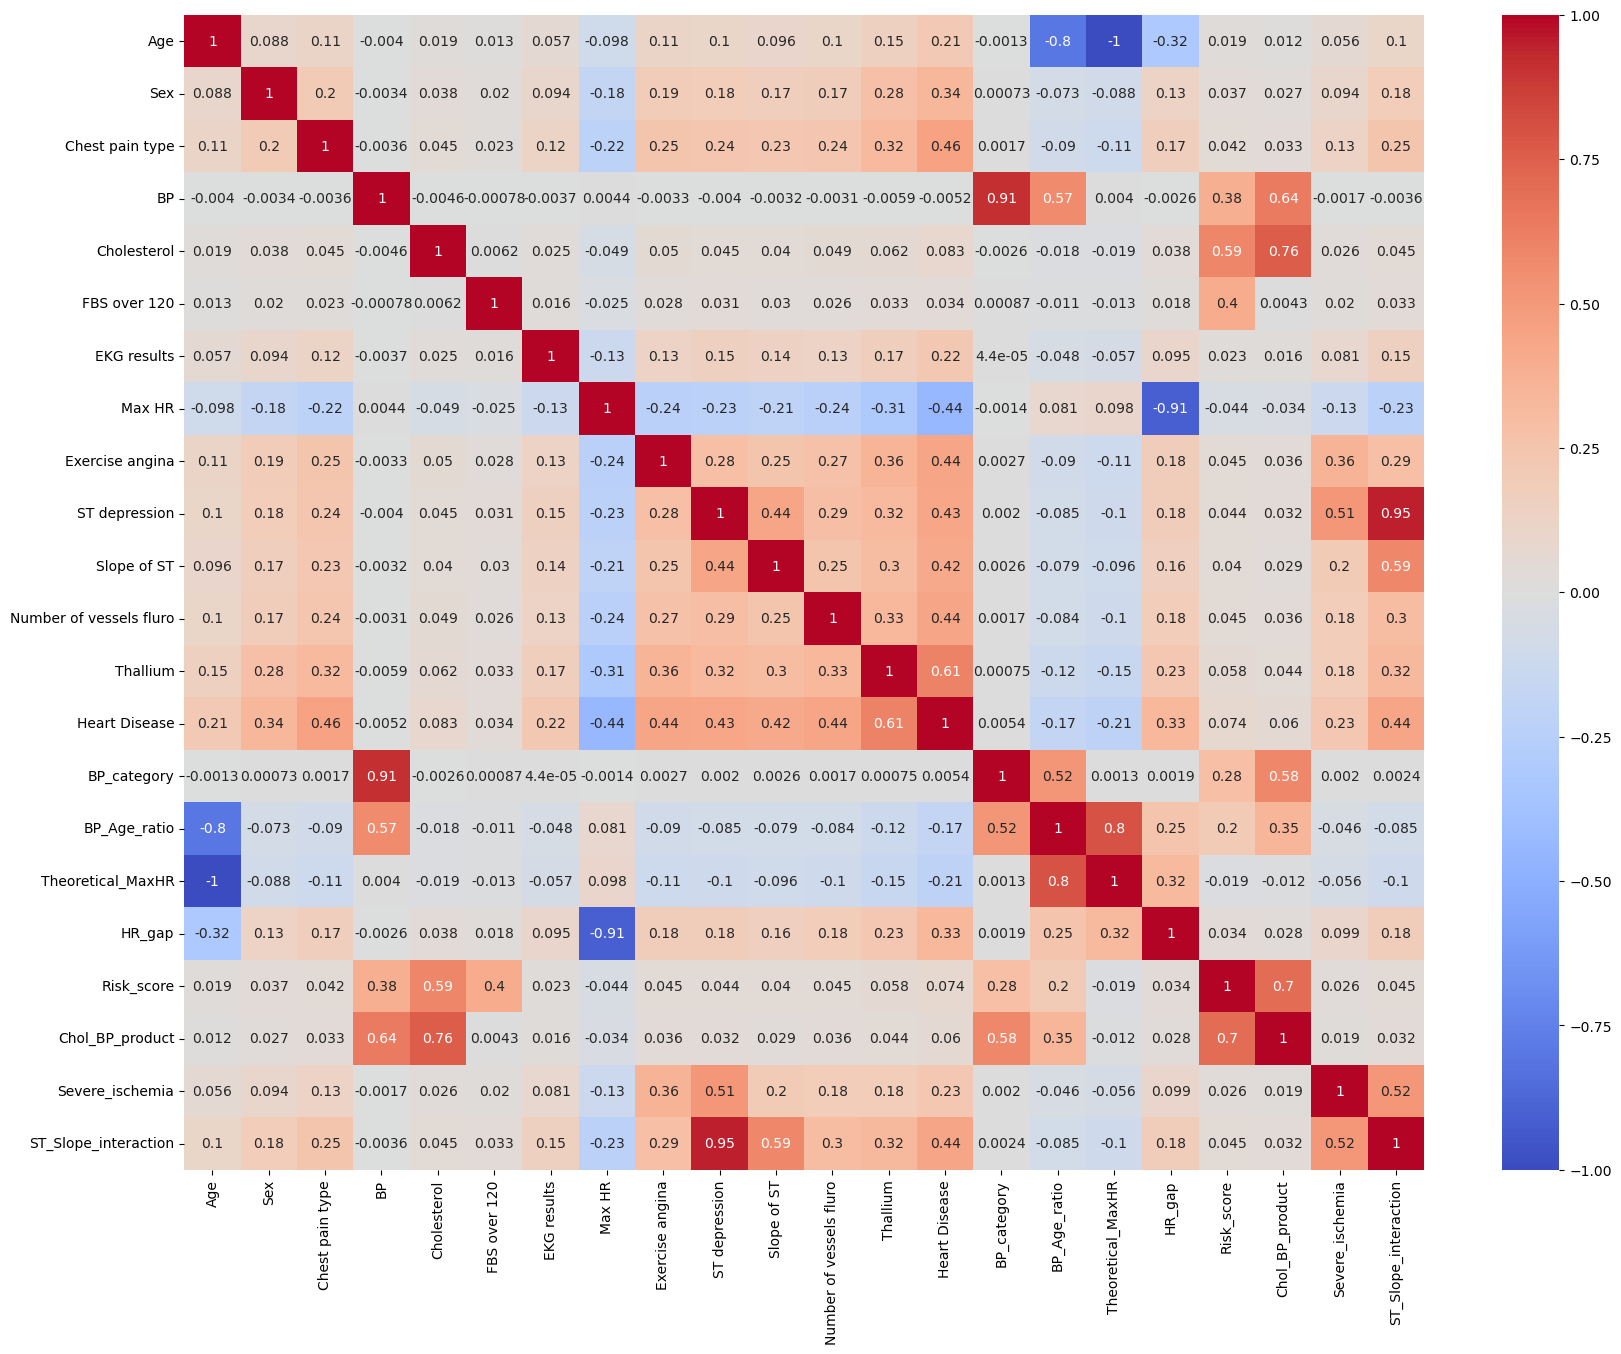

In [46]:
# check correlation now 
plt.figure(figsize=(20,15))
cor = train.corr()
sns.heatmap(cor, cmap="coolwarm", annot=True)

In [52]:
cat_cols = [
    "Sex",
    "Chest pain type",
    "FBS over 120",
    "EKG results",
    "Exercise angina",
    "Slope of ST",
    "Number of vessels fluro",
    "Thallium",
    "BP_category",
    "Risk_score"  
]


In [53]:
train_onehot = pd.get_dummies(
    train,
    columns=cat_cols,
    drop_first=True
)

In [56]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    "Age","BP","Max HR","Cholesterol","ST depression",
    "BP_Age_ratio","HR_gap","Chol_BP_product",
    "ST_Slope_interaction","Theoretical_MaxHR"
]


scaler = StandardScaler()
train_onehot[num_cols] = scaler.fit_transform(train_onehot[num_cols])


In [57]:
print(train_onehot.shape)
print(train_onehot.columns)

(630000, 34)
Index(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease',
       'BP_Age_ratio', 'Theoretical_MaxHR', 'HR_gap', 'Chol_BP_product',
       'Severe_ischemia', 'ST_Slope_interaction', 'Sex_1', 'Chest pain type_2',
       'Chest pain type_3', 'Chest pain type_4', 'FBS over 120_1',
       'EKG results_1', 'EKG results_2', 'Exercise angina_1', 'Slope of ST_2',
       'Slope of ST_3', 'Number of vessels fluro_1',
       'Number of vessels fluro_2', 'Number of vessels fluro_3', 'Thallium_6',
       'Thallium_7', 'BP_category_1', 'BP_category_2', 'BP_category_3',
       'BP_category_4', 'Risk_score_1', 'Risk_score_2', 'Risk_score_3'],
      dtype='object')


In [58]:
X = train_onehot.drop(columns=["Heart Disease"])
y = train_onehot["Heart Disease"]

In [59]:
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [60]:
scoring="roc_auc"
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring="roc_auc")
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring="roc_auc")

print("Random Forest ROC-AUC:", rf_scores.mean())
print("XGBoost ROC-AUC:", xgb_scores.mean())

/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [15:17:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [15:17:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [15:17:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [15:17:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-pack

Random Forest ROC-AUC: 0.9467113132791299
XGBoost ROC-AUC: 0.9545485492671698


In [62]:
 results = pd.DataFrame({
    "Model": [
        "Logistic (All)",
        "Random Forest (All)",
        "XGBoost (All)",
        "Logistic (Strong)",
        "Random Forest (Strong)",
        "XGBoost (Strong)",
        "Random Forest (FE)",
        "XGBoost (FE)"
    ],
    "ROC_AUC": [
        0.9529311078396198,
        0.9457540409049215,
        0.9547513557818222,
        0.9528040553750395,
        0.9324653689254456,
        0.9543247901045877,
        0.9467113132791299,
        0.9545485492671698
    ]
})

results.sort_values(by="ROC_AUC", ascending=False)

,Model,ROC_AUC
2,XGBoost (All),0.954751
7,XGBoost (FE),0.954549
5,XGBoost (Strong),0.954325
0,Logistic (All),0.952931
3,Logistic (Strong),0.952804
6,Random Forest (FE),0.946711
1,Random Forest (All),0.945754
4,Random Forest (Strong),0.932465


###  we going to continue with logistic regression since it i simple but first try it with new features but problem is multicorrelations so check for VF 

In [67]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_onehot.drop("Heart Disease", axis=1)
X = X.astype(float)

# Add constant
X_const = sm.add_constant(X)

In [68]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

vif_data = vif_data.sort_values("VIF", ascending=False)

print(vif_data)

/home/mohsinkhan/.local/lib/python3.14/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      Feature         VIF
1                         Age         inf
4                      Max HR         inf
8                      HR_gap         inf
7           Theoretical_MaxHR         inf
9             Chol_BP_product  159.829851
3                 Cholesterol   97.964267
2                          BP   80.673782
0                       const   55.619531
6                BP_Age_ratio   29.332854
11       ST_Slope_interaction   16.124843
5               ST depression   12.985154
29              BP_category_3   12.390584
15          Chest pain type_4    6.321382
28              BP_category_2    5.619708
14          Chest pain type_3    5.429848
32               Risk_score_2    3.540332
13          Chest pain type_2    3.190519
27              BP_category_1    3.118280
30              BP_category_4    2.764812
31               Risk_score_1    2.577664
20              Slope of ST_2    1.771190
16             FBS over 120_1    1.704021
21              Slope of ST_3    1

In [69]:
# Start from one-hot encoded dataset
X = train_onehot.drop("Heart Disease", axis=1)
y = train_onehot["Heart Disease"]

# List features to remove (based on VIF)
cols_to_remove = [
    "Theoretical_MaxHR",
    "HR_gap",
    "Chol_BP_product",
    "BP_Age_ratio",
    "ST_Slope_interaction"
]

# Remove BP category dummies dynamically
bp_category_cols = [col for col in X.columns if "BP_category" in col]

# Final cleaned feature set
X_clean = X.drop(columns=cols_to_remove + bp_category_cols, errors="ignore")

print("Remaining features:", len(X_clean.columns))


Remaining features: 24


In [71]:

X_vif = sm.add_constant(X_clean.astype(float))

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data = vif_data.sort_values("VIF", ascending=False)

print(vif_data.head(15))


              Feature        VIF
0               const  29.034450
10  Chest pain type_4   6.320932
9   Chest pain type_3   5.429780
8   Chest pain type_2   3.190501
23       Risk_score_2   2.917003
22       Risk_score_1   2.268590
3         Cholesterol   2.075292
5       ST depression   1.721922
11     FBS over 120_1   1.569022
2                  BP   1.483490
6     Severe_ischemia   1.467139
21         Thallium_7   1.458048
14  Exercise angina_1   1.362230
15      Slope of ST_2   1.353364
24       Risk_score_3   1.345419


In [72]:
log_model = LogisticRegression(max_iter=1000)

scores = cross_val_score(log_model, X_clean, y, cv=5, scoring="roc_auc")

print("Logistic ROC-AUC (Cleaned):", scores.mean())

Logistic ROC-AUC (Cleaned): 0.9529010198279909


In [73]:
log_model.fit(X_clean, y)

coef_df = pd.DataFrame({
    "Feature": X_clean.columns,
    "Coefficient": log_model.coef_[0]
})

coef_df["Odds_Ratio"] = np.exp(coef_df["Coefficient"])

coef_df.sort_values("Odds_Ratio", ascending=False)


,Feature,Coefficient,Odds_Ratio
9,Chest pain type_4,2.249791,9.485756
20,Thallium_7,1.954500,7.060387
18,Number of vessels fluro_3,1.932005,6.903341
17,Number of vessels fluro_2,1.877799,6.539094
19,Thallium_6,1.446599,4.248640
13,Exercise angina_1,1.169685,3.220979
16,Number of vessels fluro_1,1.066538,2.905304
6,Sex_1,1.057593,2.879431
14,Slope of ST_2,0.905879,2.474106
15,Slope of ST_3,0.904535,2.470784
